In [33]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from textwrap import dedent
import json

In [27]:
# Import embeddings and tfidf df
business_id = 'ytynqOUb3hjKeJfRj5Tshw'      #'_ab50qdWOk0DdB6XOrBitw'
reviews_path = f"filtered/business_reviews_{business_id}.parquet"

tfidf_df_path = f"filtered/tfidf_{business_id}.parquet"

reviews_df = pd.read_parquet(reviews_path)
tfidf_df = pd.read_parquet(tfidf_df_path)

In [28]:
reviews_df.head()

,review_id,business_id,stars,text,date,text_cleaned,year,char_count,word_count,avg_word_length,lemmas,normalized_embeddings
0,kKC5pBPkUCWo6mKYFUewRw,ytynqOUb3hjKeJfRj5Tshw,5.0,I love this place! Doesn't take me long to get...,2016-08-25 16:30:53,i love this place! does not take me long to ge...,2016,76,17,4.470588,love place long food great,"[0.009164642542600632, 0.0078001306392252445, ..."
1,sFQrhTbTah0o2kU_Pi2D0Q,ytynqOUb3hjKeJfRj5Tshw,5.0,"One of my favorite places to go to in Philly, ...",2016-07-14 20:24:15,"one of my favorite places to go to in philly, ...",2016,468,84,5.571429,favorite place philly visit friend place lot y...,"[0.029237790033221245, -0.0350976288318634, 0...."
2,kqn1uP3LRVjVDUD44ZSu1A,ytynqOUb3hjKeJfRj5Tshw,5.0,This might be a bit unfair to have a single re...,2017-04-07 22:27:22,this might be a bit unfair to have a single re...,2017,938,164,5.719512,bit unfair single review stall different fare ...,"[-0.08129377663135529, 0.0016336205881088972, ..."
3,qMsTe9QznpNQk1AKbYLp-w,ytynqOUb3hjKeJfRj5Tshw,4.0,"Alright, I remember the first time I went to t...",2017-07-18 17:33:29,"alright, i remember the first time i went to t...",2017,1194,224,5.330357,alright remember time go reading terminal over...,"[0.01533668301999569, -0.034433893859386444, 0..."
4,nmMIRBNONIICe7CFHnfadQ,ytynqOUb3hjKeJfRj5Tshw,4.0,"It's an experience, to say the least! Not as ...",2013-08-03 20:18:22,"it is an experience, to say the least! not as ...",2013,193,38,5.078947,experience good vegan option basic left neat p...,"[-0.027125539258122444, -0.00930054672062397, ..."


In [29]:
tfidf_df.head()

,TFIDF_00,TFIDF_00 pm,TFIDF_000,TFIDF_10,TFIDF_10 00,TFIDF_10 15,TFIDF_10 hours,TFIDF_10 market,TFIDF_10 minutes,TFIDF_10 places,...,TFIDF_york city,TFIDF_yorker,TFIDF_young,TFIDF_yuck,TFIDF_yum,TFIDF_yummy,TFIDF_yummy food,TFIDF_yup,TFIDF_zillion,TFIDF_zoo
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.122023,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.113708,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [30]:
X = np.vstack(reviews_df.normalized_embeddings.values)

In [31]:
for n in [30, 50, 75, 100, 150]:
    pca = PCA(n_components=n, random_state=42)
    X_tmp = pca.fit_transform(X)
    print(f"Variance retained for {n} components: {pca.explained_variance_ratio_.sum()}")
    

Variance retained for 30 components: 0.514943520754234
Variance retained for 50 components: 0.6446389850339508
Variance retained for 75 components: 0.7553080620597963
Variance retained for 100 components: 0.8327741348333985
Variance retained for 150 components: 0.9270495738021929


In [34]:
# Mean centering
scaler = StandardScaler(with_std=False)
X_centered = scaler.fit_transform(X)

In [35]:
pca = PCA(n_components=150, whiten=True, random_state=42)
X_reduced = pca.fit_transform(X_centered)

Z = linkage(X_reduced, method="ward")

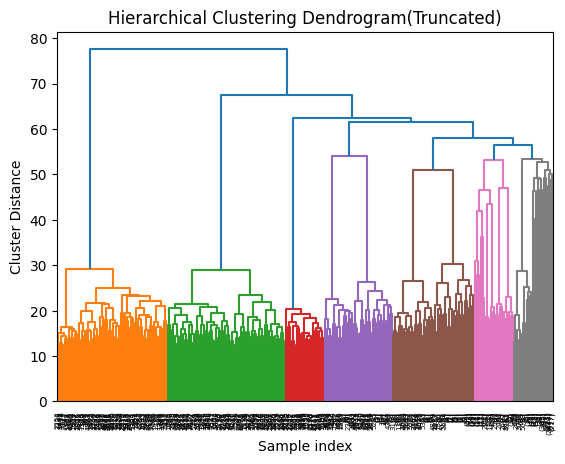

In [36]:
dendrogram(Z, truncate_mode="level", p=10)
plt.xlabel("Sample index")
plt.ylabel("Cluster Distance")
plt.title("Hierarchical Clustering Dendrogram(Truncated)")
plt.show()

In [37]:
import numpy as np
from scipy.cluster.hierarchy import fcluster

def auto_select_k_from_dendrogram(Z, tail_frac=0.25):
    """
    Automatically estimate k from a hierarchical linkage matrix by
    finding the largest jump in merge distances near the top of the tree.

    Parameters
    ----------
    Z : ndarray
        Linkage matrix from scipy.cluster.hierarchy.linkage
    tail_frac : float
        Fraction of the highest merges to consider (default 25%)

    Returns
    -------
    k_est : int
        Estimated optimal number of clusters
    threshold : float
        Distance threshold used to cut the tree
    labels : ndarray
        Cluster labels for each sample
    """

    # Heights at which merges occur
    heights = Z[:, 2]

    # Sort merge heights
    heights_sorted = np.sort(heights)

    # Consecutive differences (gaps)
    diffs = np.diff(heights_sorted)

    # Focus only on top of tree (big structure)
    tail_start = int(len(diffs) * (1 - tail_frac))
    tail_diffs = diffs[tail_start:]
    tail_heights = heights_sorted[tail_start + 1:]

    # Largest jump in that region
    jump_idx = np.argmax(tail_diffs)

    h_before = tail_heights[jump_idx] - tail_diffs[jump_idx]
    h_after  = tail_heights[jump_idx]

    # Final cut threshold
    threshold = 0.5 * (h_before + h_after)

    # Flat clustering at this distance
    labels = fcluster(Z, t=threshold, criterion="distance")
    k_est = labels.max()

    return k_est, threshold, labels


In [38]:
k_est, threshold, labels_auto = auto_select_k_from_dendrogram(Z)

print("Auto-selected k:", k_est)
print("Distance threshold:", threshold)


Auto-selected k: 2
Distance threshold: 72.47333499516134


In [7]:
# cluster function
def evaluate_k_range(embeddings, k_values_list, use_cosine_silhouette=True):
    results = []

    theme_avg_sims = {}
    
    for k in k_values_list:
        print(f"Average cluster centroid similarity scores for k={k}...")
        
        # Fit KMeans
        # n_init=10; randomly set cluster centroids 10 different times to land on optimal centroid locations
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        centroids = kmeans.cluster_centers_

        # ----------------------INTRA-CLUSTER COHESION------------------------#
        # Per cluster cohesion
        intra_cosines = []
        for cluster_id in range(k):
            cluster_embs = embeddings[labels == cluster_id]

            if len(cluster_embs) > 1:
                cos_sim = cosine_similarity(cluster_embs)

                # only use upper triangle of the matrix: ignore duplicates and diagonal(exclude self-similarity)
                # k=1, start 1 above diagonal
                upper = cos_sim[np.triu_indices_from(cos_sim, k=1)]
                avg_intra = np.mean(upper)
            else:
                avg_intra = np.nan

            intra_cosines.append(avg_intra)

        # overall theme purity
        # ignore nan(clusters with 1 review)
        avg_intra_cluster_cos = np.nanmean(intra_cosines)
        
        # ----------------------INTER-CLUSTER SEPARATION------------------------#

        # Inter-cluster separation; cosine similarity measure(lower is better)
        # clusters centroid similarity
        centroid_sim_mat = cosine_similarity(centroids)
    
        # only use upper triangle of the matrix: ignore duplicates and diagonal(exclude self-similarity)
        # k=1, start 1 above diagonal
        upper = centroid_sim_mat[np.triu_indices_from(centroid_sim_mat, k=1)]
        
        results.append({
            "k": k,
            "avg_intra_cosine": avg_intra_cluster_cos,
            "inter_centroid_cosine": upper.mean()
        })

    return pd.DataFrame(results)


In [8]:
k_values = range(2, 13)   # test k=2 through 12
results_df = evaluate_k_range(X, k_values)
results_df

Average cluster centroid similarity scores for k=2...
Average cluster centroid similarity scores for k=3...
Average cluster centroid similarity scores for k=4...
Average cluster centroid similarity scores for k=5...
Average cluster centroid similarity scores for k=6...
Average cluster centroid similarity scores for k=7...
Average cluster centroid similarity scores for k=8...
Average cluster centroid similarity scores for k=9...
Average cluster centroid similarity scores for k=10...
Average cluster centroid similarity scores for k=11...
Average cluster centroid similarity scores for k=12...


,k,avg_intra_cosine,inter_centroid_cosine
0,2,0.432641,0.873916
1,3,0.451250,0.864083
2,4,0.463206,0.851744
3,5,0.464439,0.834386
4,6,0.475248,0.827332
5,7,0.482991,0.824403
6,8,0.489689,0.818991
7,9,0.485532,0.807300
8,10,0.487630,0.798873
9,11,0.492378,0.801500


#### Theme Overlap(Separation) and Theme Impurity(Cohesion)

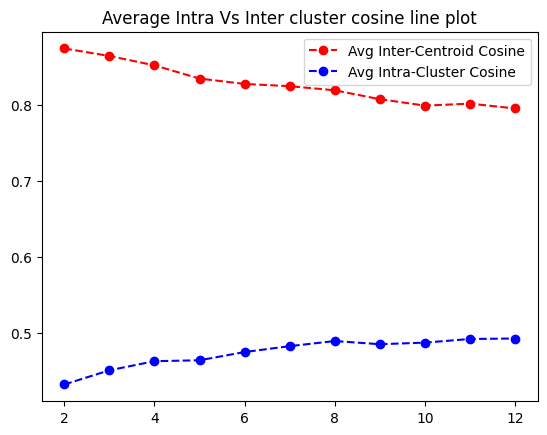

In [9]:
plt.plot(results_df['k'], results_df['inter_centroid_cosine'], marker='o', linestyle='--', c='red', label='Avg Inter-Centroid Cosine')
plt.plot(results_df['k'], results_df['avg_intra_cosine'], marker='o', linestyle='--', c='blue', label='Avg Intra-Cluster Cosine')
plt.title('Average Intra Vs Inter cluster cosine line plot')
plt.legend()
plt.show()

As k increases, intra-cluster cohesion improves while inter-centroid similarity decreases with both curves saturating around k=8-9. This marks an optimal balance between internal theme purity and external theme separation.

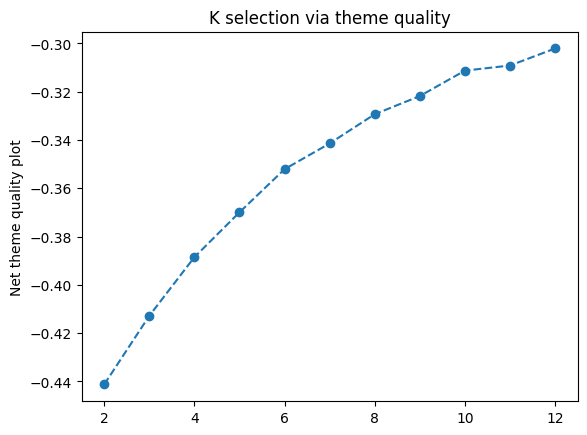

In [67]:
# Net theme quality
plt.plot(results_df['k'], results_df['avg_intra_cosine'] - results_df['inter_centroid_cosine'], marker='o', linestyle='--')
plt.ylabel('Net theme quality plot')
plt.title("K selection via theme quality")
plt.show()

In [19]:
# Choose best k
best_k = 8

In [10]:
# Run clustering across multiple k
clustering_model = KMeans(n_clusters=8, random_state=42, n_init=10)
labels = clustering_model.fit_predict(X)

In [13]:
labels.shape

(7673,)

In [16]:
# Cluster sizes
reviews_df.cluster.value_counts().sort_values(ascending=False)

cluster
1    1326
7    1232
3    1178
2     926
0     876
6     838
5     673
4     624
Name: count, dtype: int64

In [14]:
# Assign clusters
reviews_df = reviews_df.copy()
reviews_df['cluster'] = labels

In [15]:
reviews_df.head()

,review_id,business_id,stars,text,date,text_cleaned,year,char_count,word_count,avg_word_length,lemmas,normalized_embeddings,cluster
0,vHLTOsdILT7xgTu7TAWTUQ,_ab50qdWOk0DdB6XOrBitw,5.0,This place has amazing oysters and the BEST bl...,2016-07-25 04:34:34,this place has amazing oysters and the best bl...,2016,557,107,5.205607,place amazing oyster well bloody mary stay nol...,"[0.041993144899606705, 0.05851171910762787, 0....",7
1,I90lP6oPICTkrhCFGQt5tA,_ab50qdWOk0DdB6XOrBitw,5.0,OH MY!! A must try. We had no idea there would...,2016-12-19 20:27:16,oh my!! a must try. we had no idea there would...,2016,425,82,5.182927,oh try idea line definitely worth oyster amazi...,"[-0.03591486066579819, -0.03511025756597519, 0...",7
2,469eAl2fB069YTF_B5zW7w,_ab50qdWOk0DdB6XOrBitw,5.0,The fried seafood was extremely hot. Very nice...,2018-08-23 20:58:39,the fried seafood was extremely hot. very nice...,2018,530,97,5.463918,fried seafood extremely hot nice taste add sof...,"[-0.03977707028388977, 0.028981056064367294, 0...",3
3,aPpHBDs7Jiiq0sb9YutOhQ,_ab50qdWOk0DdB6XOrBitw,5.0,I love this place. I wish my stay was longer s...,2013-06-24 18:07:12,i love this place. i wish my stay was longer s...,2013,193,40,4.825000,love place wish stay long visit food awesome d...,"[-0.023319782689213753, 0.018473681062459946, ...",0
4,k9OG5kA5ebruSx_f1T-P-A,_ab50qdWOk0DdB6XOrBitw,3.0,"Loved the chargrilled oysters! I mean, seriou...",2010-10-06 08:03:20,"loved the chargrilled oysters! i mean, serious...",2010,1277,230,5.552174,love chargrilled oyster mean seriously tasty c...,"[-0.018412481993436813, 0.05632537975907326, 0...",2


In [17]:
# Extract top terms from each cluster TF-IDF
tfidf_df

,TFIDF_acme,TFIDF_best,TFIDF_chargrilled,TFIDF_delicious,TFIDF_food,TFIDF_fried,TFIDF_good,TFIDF_great,TFIDF_just,TFIDF_line,...,TFIDF_orleans,TFIDF_oyster,TFIDF_oysters,TFIDF_place,TFIDF_po,TFIDF_raw,TFIDF_service,TFIDF_time,TFIDF_wait,TFIDF_worth
0,0.283809,0.582591,0.244760,0.000000,0.000000,0.000000,0.000000,0.252700,0.000000,0.000000,...,0.000000,0.000000,0.413473,0.235814,0.000000,0.000000,0.000000,0.000000,0.479278,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.574414,...,0.000000,0.000000,0.348148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.740839
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.258081,0.186617,0.444631,0.000000,0.400112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.479627,0.000000,0.210825,0.516036
3,0.000000,0.000000,0.000000,0.000000,0.451968,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.548417,0.000000,0.000000,0.453874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.164636,0.000000,0.425952,0.172112,0.000000,0.510519,0.123051,0.000000,0.161904,0.000000,...,0.000000,0.297617,0.559658,0.000000,0.170464,0.170298,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,0.000000,0.000000,0.000000,0.000000,0.204096,0.254967,0.737462,0.000000,0.242578,0.395284,...,0.000000,0.000000,0.119789,0.000000,0.000000,0.000000,0.236920,0.252812,0.000000,0.000000
7669,0.000000,0.000000,0.000000,0.000000,0.268927,0.000000,0.000000,0.000000,0.000000,0.520846,...,0.000000,0.000000,0.000000,0.810183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7670,0.000000,0.000000,0.000000,0.273254,0.000000,0.000000,0.586087,0.000000,0.257047,0.000000,...,0.000000,0.000000,0.253869,0.217182,0.000000,0.540746,0.251051,0.000000,0.220704,0.000000
7671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250037,0.000000,0.000000,0.268043,...,0.000000,0.000000,0.487377,0.555926,0.000000,0.346041,0.000000,0.000000,0.282472,0.345703


In [21]:
tf_df = tfidf_df.copy()
tf_df['cluster'] = labels

In [35]:
cluster_top_terms = {}
for c in range(best_k):
    cluster_tf_df = tf_df[tf_df['cluster'] == c].drop(columns='cluster')

    # calculate each words average representation across reviews in that cluster
    cluster_mean_tf_idf = cluster_tf_df.mean(axis=0)

    top_terms = cluster_mean_tf_idf.sort_values(ascending=False).head(10).index.\
                                                                str.replace('TFIDF_', '').\
                                                                tolist()
    
    # select top 10 terms
    cluster_top_terms[c] = top_terms

In [36]:
for k,v in cluster_top_terms.items():
    print(f'cluster {k}: {v}')

cluster 0: ['orleans', 'new', 'oysters', 'place', 'food', 'good', 'best', 'line', 'great', 'oyster']
cluster 1: ['oysters', 'good', 'oyster', 'great', 'place', 'raw', 'best', 'wait', 'line', 'worth']
cluster 2: ['chargrilled', 'oysters', 'good', 'line', 'wait', 'oyster', 'best', 'delicious', 'place', 'raw']
cluster 3: ['good', 'oysters', 'food', 'fried', 'great', 'delicious', 'place', 'service', 'just', 'best']
cluster 4: ['acme', 'oysters', 'oyster', 'good', 'line', 'time', 'just', 'new', 'wait', 'food']
cluster 5: ['po', 'oysters', 'good', 'great', 'oyster', 'fried', 'food', 'place', 'line', 'chargrilled']
cluster 6: ['food', 'service', 'line', 'place', 'good', 'wait', 'great', 'just', 'time', 'worth']
cluster 7: ['oysters', 'line', 'wait', 'good', 'place', 'oyster', 'chargrilled', 'food', 'time', 'great']


In [39]:
# Select cluster represenatative reviews; closest to cluster centroid
# centroids
centroids = clustering_model.cluster_centers_

representative_reviews_ids = {}

num_of_examples = 5

for c in range(best_k):
    cluster_idx = np.where(reviews_df.cluster.values == c)[0]

    # Get their embeddings
    cluster_vecs = X[cluster_idx]

    # similarity to this cluster centroid
    sims = cosine_similarity(cluster_vecs, centroids[c].reshape(1, -1)).ravel()

    top_examples_ids = np.argsort(sims)[-num_of_examples:]

    representative_reviews_ids[c] = cluster_idx[top_examples_ids].tolist()

In [40]:
representative_reviews_ids

{0: [3360, 1043, 5651, 2237, 2749],
 1: [3783, 2277, 2119, 5930, 5815],
 2: [365, 2003, 6333, 2412, 1435],
 3: [6878, 5861, 5239, 1071, 6425],
 4: [3897, 4409, 2504, 1376, 5780],
 5: [4603, 874, 7537, 4652, 5256],
 6: [3992, 6498, 7576, 3358, 7044],
 7: [1907, 5174, 5850, 6121, 7510]}

In [46]:
for k,v in representative_reviews_ids.items():
    print(f'cluster {k} most central examples:\n')
    
    texts = reviews_df.loc[v, 'text'].tolist()

    for i, t in enumerate(texts):
        print(f"{i}: {t}\n")

cluster 0 most central examples:

0: Honestly one of the best meals I had in my life with the grilled oysters.  We are going back to New Orleans again just for this place.

1: My wife and I enjoyed the restaurant so much that we had to go twice during our visit in New Orleans.  Chargrilled oysters were awesome and worth the wait in line.  The raw oysters were also very fresh and delicious.  I recommend eating at the bar.

2: Very popular restaurant. I must say it was delicious, enjoyed the oysters! Definitely a must if your visiting new orleans.

3: This place is probably one of the best restaurants I've visited in New Orleans. I've heard they make good raw and cooked oysters. 

As expected, the line was insanely long and we had to wait for 20-30 minutes to get our table. The first thing I ordered were half dozen of raw oysters, half dozen of chargrilled oysters, boo fries and Rockefeller soup. They were all good and the chargrilled oysters just blew my mind. Perfect amount of butter, 

In [58]:
# LLM cluster labelling

def generate_theme(cid, terms, examples):
    examples_text = "\n---\n".join(
        [f"- {e}" for e in examples]
    )

    prompt = dedent(f"""
    You are an expert in customer experience analytics.

    You are analyzing a cluster of customer reviews

    Cluster ID: {cid}

    Top TF-IDF Terms:
    {terms}

    Representative Reviews:
    {examples_text}

    Return your response as VALID JSON ONLY in this exact schema:

    {{
        "theme_name": "",
        "summary": "",
        "likes": ["", ""],
        "dislikes": ["", ""],
        "business_impact": ""
    }}

    RULES:
    - Do NOT include markdown
    - Do NOT include explanations
    - Do NOT include extra text outside the JSON
    - Keep the theme name to 3-5 words
    - Keep it concise, specific, and business-friendly.
    """)

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "system", 
                   "content": ("You are an expert in customer experience analytics."
                               "You MUST return ONLY valid JSON that strictly follows the provided schema."
                               "Do not include markdown, comments or extra text."
                              )
                  },
                  {"role": "user", 
                   "content": prompt}],
        temperature=0.3
    )

    return json.loads(response.choices[0].message.content)

In [59]:
# Load .env
from dotenv import load_dotenv
load_dotenv()

True

In [60]:
# Create connect to OPENAI API
from openai import OpenAI
client = OpenAI()

In [64]:
examples = reviews_df.loc[representative_reviews_ids[0], 'text'].tolist()

generate_theme(0, cluster_top_terms[0], examples)

{'theme_name': 'Oysters in New Orleans',
 'summary': 'Customers rave about the grilled and raw oysters, highlighting their freshness and flavor. The restaurant is popular, often requiring a wait, but patrons feel the experience is worth it.',
 'likes': ['delicious oysters', 'great dining experience'],
 'dislikes': ['long wait times', 'mixed reviews on other dishes'],
 'business_impact': 'High customer satisfaction with oysters can drive repeat visits and positive word-of-mouth.'}

In [65]:
theme_cards = {}
for c in range(best_k):
    examples = reviews_df.loc[representative_reviews_ids[c], 'text'].tolist()
    
    # save generate_theme response for each cluster
    theme_cards[c] = generate_theme(c, cluster_top_terms[c], examples)


In [66]:
theme_cards

{0: {'theme_name': 'Oysters in New Orleans',
  'summary': 'Customers rave about the grilled and raw oysters, highlighting their freshness and flavor. The restaurant is popular, often requiring a wait, but many feel the experience is worth it.',
  'likes': ['delicious grilled oysters', 'fresh raw oysters'],
  'dislikes': ['long wait times', 'inconsistent po-boy quality'],
  'business_impact': 'High customer satisfaction can drive repeat visits and positive word-of-mouth.'},
 1: {'theme_name': 'Oysters Quality and Experience',
  'summary': 'Customers rave about the quality of oysters, both raw and char-grilled, highlighting their deliciousness despite some service issues.',
  'likes': ['Delicious char-grilled oysters', 'Great raw oysters'],
  'dislikes': ['Horrible service', 'Long wait times'],
  'business_impact': 'Positive food reviews can drive repeat visits despite service challenges.'},
 2: {'theme_name': 'Chargrilled Oysters Experience',
  'summary': 'Customers rave about the amazi